In [1989]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import warnings
from matplotlib.pyplot import xticks
%matplotlib inline
warnings.filterwarnings('ignore')

In [1990]:
#pip install xgboost

In [1991]:
#from numpy import loadtxt
#from xgboost import XGBClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score

In [1992]:
#CreditRisk_df.columns=CreditRisk_df.columns.str.strip()

In [1993]:
LeadScore_df = pd.read_csv("Lead-analysis/2022_02_02_v3-5-16.csv", encoding='UTF-8')
LeadScore_df

,Check LLC in Name,Email Domain,Is_Submitted,LS Amount to Borrow,LS GAS,LS GAS Grouped,LS Months in Business,LS Self Graded Credit,LS_State,Web_Ad_Outlet__c,Web_Ad_Outlet_Source__c
0,1,@DIFMEBEAUTYBAR.COM,1,10000,250000,$200k-$500k,13.0,4,TX,1101,Lending Tree
1,1,@GMAIL.COM,0,12500,506000,$500k-$1mm,13.0,3,TX,1101,Lending Tree
2,1,@GMAIL.COM,1,65000,100000,$100k-$200k,13.0,4,LA,1101,Lending Tree
3,1,@GMAIL.COM,1,10000,100000,$100k-$200k,12.0,4,AL,1101,Lending Tree
4,0,@GMAIL.COM,0,10000,100000,$100k-$200k,13.0,4,LA,1101,Lending Tree
...,...,...,...,...,...,...,...,...,...,...,...
17195,0,@ICLOUD.COM,0,20000,405000,$200k-$500k,171.0,4,GA,1101,Lending Tree
17196,1,@MONOGRAMJUNKIE.COM,0,10000,400000,$200k-$500k,178.0,4,LA,1101,Lending Tree
17197,1,@GOVERNMENTCONTRACTSLLC.COM,0,15000,150000,$100k-$200k,209.0,2,OH,1101,Lending Tree
17198,0,@AOL.COM,0,50000,125000,$100k-$200k,217.0,3,NC,1101,Lending Tree


In [1994]:
LeadScore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17200 entries, 0 to 17199
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Check LLC in Name        17200 non-null  int64  
 1   Email Domain             17200 non-null  object 
 2   Is_Submitted             17200 non-null  int64  
 3   LS Amount to Borrow      17200 non-null  int64  
 4   LS GAS                   17200 non-null  int64  
 5   LS GAS Grouped           17200 non-null  object 
 6   LS Months in Business    15574 non-null  float64
 7   LS Self Graded Credit    17200 non-null  int64  
 8   LS_State                 17200 non-null  object 
 9   Web_Ad_Outlet__c         17200 non-null  int64  
 10  Web_Ad_Outlet_Source__c  17200 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 1.4+ MB


In [1995]:
LeadScore_df.isnull().sum()

Check LLC in Name             0
Email Domain                  0
Is_Submitted                  0
LS Amount to Borrow           0
LS GAS                        0
LS GAS Grouped                0
LS Months in Business      1626
LS Self Graded Credit         0
LS_State                      0
Web_Ad_Outlet__c              0
Web_Ad_Outlet_Source__c       0
dtype: int64

In [1996]:
LeadScore_df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [1997]:
LeadScore_df['LS_State']= LeadScore_df['LS_State'].replace(['47'], 'HI')
LeadScore_df['LS_State'].sample(10)

14545    CA
977      LA
9762     HI
11939    MO
16859    OH
1571     HI
1563     HI
336      GA
11368    CO
10990    HI
Name: LS_State, dtype: object

In [1998]:
#LeadScore_df.rename(columns=lambda x:x.strip())

In [1999]:
#LeadScore_df.columns = LeadScore_df.str.replace(r'_x$','')

In [2000]:
#LeadScore_df.rename(columns=lambda x: x.replace('_x$',''), inplace=True)

In [2001]:
LeadScore_df.columns

Index(['Check_LLC_in_Name', 'Email_Domain', 'Is_Submitted',
       'LS_Amount_to_Borrow', 'LS_GAS', 'LS_GAS_Grouped',
       'LS_Months_in_Business', 'LS_Self_Graded_Credit', 'LS_State',
       'Web_Ad_Outlet__c', 'Web_Ad_Outlet_Source__c'],
      dtype='object')

In [2002]:
LeadScore_df.groupby('Is_Submitted').size()

Is_Submitted
0    14084
1     3116
dtype: int64

In [2003]:
LeadScore_df.groupby('LS_Amount_to_Borrow').sum()['Is_Submitted'].round(decimals=2)

LS_Amount_to_Borrow
1           0
2           1
10          0
50          0
100         0
           ..
18000000    0
30000000    0
45000000    0
50000000    0
70000000    0
Name: Is_Submitted, Length: 267, dtype: int64

In [2004]:
LeadScore_df.groupby('LS_GAS').sum()['Is_Submitted'].round(decimals=2)

LS_GAS
60000        670
100000        97
100008         1
100101         1
100208         0
            ... 
480039864      0
600000000      0
653081076      0
720000000      0
942840000      0
Name: Is_Submitted, Length: 882, dtype: int64

In [2005]:
#LeadScore_df['Requested_Amount'] = LeadScore_df['Requested_Amount'].str.replace(',','')

In [2006]:
#LeadScore_df.to_csv('Lead_Data.csv', index = False)

In [2007]:
LeadScore_df.groupby('Is_Submitted').mean()['LS_Self_Graded_Credit'].round(decimals=2)

Is_Submitted
0    3.02
1    3.14
Name: LS_Self_Graded_Credit, dtype: float64

In [2008]:
LeadScore_df.groupby('Web_Ad_Outlet_Source__c').sum()['Is_Submitted'].round(decimals=2)

Web_Ad_Outlet_Source__c
Digital - Affiliate     239
Digital-Organic         539
Digital-PPC             173
Direct                  727
Lending Tree           1006
Strategic Partners      432
Name: Is_Submitted, dtype: int64

In [2009]:
LeadScore_mask = (LeadScore_df.Email_Domain == "@GMAIL.COM") | (LeadScore_df.Email_Domain == '@YAHOO.COM')

Lead_filtered= LeadScore_df[LeadScore_mask]
Lead_filtered.sample(10)

,Check_LLC_in_Name,Email_Domain,Is_Submitted,LS_Amount_to_Borrow,LS_GAS,LS_GAS_Grouped,LS_Months_in_Business,LS_Self_Graded_Credit,LS_State,Web_Ad_Outlet__c,Web_Ad_Outlet_Source__c
459,0,@GMAIL.COM,0,7500,60000,"Less than $100,000",12.0,4,HI,1267,Strategic Partners
11271,0,@YAHOO.COM,0,20000,300000,$200k-$500k,17.0,3,AL,1101,Lending Tree
9541,0,@GMAIL.COM,0,7500,60000,"Less than $100,000",36.0,4,HI,1010,Digital-PPC
9879,1,@GMAIL.COM,0,7500,60000,"Less than $100,000",24.0,4,HI,1267,Strategic Partners
15911,1,@GMAIL.COM,0,50000,116000,$100k-$200k,18.0,3,OH,1101,Lending Tree
15829,1,@GMAIL.COM,0,25000,160000,$100k-$200k,15.0,4,NC,1101,Lending Tree
9964,1,@GMAIL.COM,0,37500,60000,"Less than $100,000",36.0,4,HI,1000,Digital-Organic
1397,1,@GMAIL.COM,0,17500,60000,"Less than $100,000",24.0,3,HI,1011,Digital-PPC
13470,1,@GMAIL.COM,0,15000,107000,$100k-$200k,156.0,1,GA,1101,Lending Tree
9019,1,@GMAIL.COM,0,50000,894024,$500k-$1mm,NaN,4,HI,1280,Strategic Partners


In [2010]:
LeadScore_df['Email_Domain'] = LeadScore_df['Email_Domain'].apply(lambda x:0 if x == '@GMAIL.COM' else 1 if x=='@YAHOO.COM' else 2)

In [2011]:
#LeadScore_df['Email_Domain']=LeadScore_df['Email_Domain'].map(lambda x:x == 0 if (x != '@GMAIL.COM') | (x !='@YAHOO.COM') else x)

In [2012]:
LeadScore_df =LeadScore_df.dropna(subset = ['LS_Months_in_Business'], axis = 0)

In [2013]:
#LeadScore_df =LeadScore_df.dropna(subset = ['State'], axis = 0)

In [2014]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
LeadScore_df['Web_Ad_Outlet_code'] = ord_enc.fit_transform(LeadScore_df[['Web_Ad_Outlet__c']])
LeadScore_df[['Web_Ad_Outlet_code',"Web_Ad_Outlet__c"]].sample(10)

,Web_Ad_Outlet_code,Web_Ad_Outlet__c
5167,23.0,5071
1171,16.0,1267
6192,0.0,1000
11406,3.0,1101
3152,18.0,5028
14220,3.0,1101
11275,3.0,1101
9647,0.0,1000
12601,3.0,1101
3645,2.0,1011


In [2015]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
LeadScore_df['Web_Ad_Outlet_Source_code'] = ord_enc.fit_transform(LeadScore_df[['Web_Ad_Outlet_Source__c']])
LeadScore_df[['Web_Ad_Outlet_Source__c',"Web_Ad_Outlet_Source_code"]].sample(10)

,Web_Ad_Outlet_Source__c,Web_Ad_Outlet_Source_code
13937,Lending Tree,4.0
7690,Direct,3.0
11573,Lending Tree,4.0
5624,Direct,3.0
6854,Digital - Affiliate,0.0
6767,Digital-Organic,1.0
14946,Lending Tree,4.0
6642,Digital-Organic,1.0
4142,Digital-Organic,1.0
4903,Direct,3.0


In [2016]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
LeadScore_df['LS_State_code'] = ord_enc.fit_transform(LeadScore_df[['LS_State']])
LeadScore_df[['LS_State_code',"LS_State"]].tail(10)

,LS_State_code,LS_State
17190,44.0,VA
17191,37.0,PA
17192,27.0,NC
17193,33.0,NY
17194,10.0,GA
17195,10.0,GA
17196,18.0,LA
17197,34.0,OH
17198,27.0,NC
17199,9.0,FL


In [2017]:
#dummy1 = pd.get_dummies(LeadScore_df['Web_Ad_Outlet_Source__c'], drop_first=True)
#dummy1.head()

In [2018]:
# Adding the results to the master dataframe
#LeadScore_df = pd.concat([LeadScore_df, dummy1], axis=1)
#LeadScore_df.head()

In [2019]:
#from sklearn.preprocessing import OneHotEncoder

#Web_Outlet_Source = OneHotEncoder()
#Web_results = Web_Outlet_Source.fit_transform(LeadScore_df[["Web_Ad_Outlet_Source__c"]])
#pd.DataFrame(Web_results.toarray(), columns=Web_Outlet_Source.categories_).head()                                       

In [2020]:
#LeadScore_df =  LeadScore_df.join(pd.DataFrame(Web_results.toarray(), columns=Web_Outlet_Source.categories_))

In [2021]:
LeadScore_df.dtypes

Check_LLC_in_Name              int64
Email_Domain                   int64
Is_Submitted                   int64
LS_Amount_to_Borrow            int64
LS_GAS                         int64
LS_GAS_Grouped                object
LS_Months_in_Business        float64
LS_Self_Graded_Credit          int64
LS_State                      object
Web_Ad_Outlet__c               int64
Web_Ad_Outlet_Source__c       object
Web_Ad_Outlet_code           float64
Web_Ad_Outlet_Source_code    float64
LS_State_code                float64
dtype: object

In [2022]:
LeadScore_df = LeadScore_df.drop(['Web_Ad_Outlet__c', 'LS_GAS_Grouped','LS_State','Web_Ad_Outlet_Source__c'], axis=1)
LeadScore_df.sample(10)

,Check_LLC_in_Name,Email_Domain,Is_Submitted,LS_Amount_to_Borrow,LS_GAS,LS_Months_in_Business,LS_Self_Graded_Credit,Web_Ad_Outlet_code,Web_Ad_Outlet_Source_code,LS_State_code
5834,1,2,0,37500,150000,36.0,3,0.0,1.0,11.0
6537,1,0,0,37500,60000,24.0,4,17.0,3.0,9.0
16569,1,2,0,100000,220000,48.0,4,3.0,4.0,42.0
15240,1,2,0,250000,350000,19.0,2,3.0,4.0,1.0
13305,1,0,0,20000,210000,28.0,4,3.0,4.0,46.0
14129,1,0,0,50000,120000,22.0,4,3.0,4.0,9.0
12911,1,0,0,10000,188000,75.0,4,3.0,4.0,23.0
13684,0,0,0,50000,200000,109.0,3,3.0,4.0,37.0
11826,1,2,0,25000,175000,162.0,2,3.0,4.0,9.0
8205,1,2,1,75000,150000,24.0,1,2.0,2.0,11.0


In [2023]:
#pd.options.display.float_format = '{:,.2f}'.format

In [2024]:
LeadScore_df.describe()

,Check_LLC_in_Name,Email_Domain,Is_Submitted,LS_Amount_to_Borrow,LS_GAS,LS_Months_in_Business,LS_Self_Graded_Credit,Web_Ad_Outlet_code,Web_Ad_Outlet_Source_code,LS_State_code
count,15574.000000,15574.000000,15574.000000,15574.000000,1.557400e+04,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000
mean,0.556569,0.712534,0.190767,47807.092269,2.705511e+05,44.227816,3.059137,8.288943,2.961988,17.928471
std,0.496806,0.886626,0.392918,50418.363511,1.322106e+06,60.215780,0.992379,8.518415,1.419279,12.468473
min,0.000000,0.000000,0.000000,5000.000000,6.000000e+04,6.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,17500.000000,6.000000e+04,24.000000,2.000000,3.000000,2.000000,11.000000
50%,1.000000,0.000000,0.000000,37500.000000,1.500000e+05,26.000000,3.000000,3.000000,3.000000,11.000000
75%,1.000000,2.000000,0.000000,60000.000000,2.500000e+05,36.000000,4.000000,17.000000,4.000000,27.000000
max,1.000000,2.000000,1.000000,350000.000000,1.000000e+08,997.000000,4.000000,26.000000,5.000000,48.000000


In [2025]:
#X = LeadScore_df

In [2026]:
#from sklearn.preprocessing import scale
#X_scaled = scale(X)
#np.mean(X),np.std(X)
#np.mean(X_scaled),np.std(X_scaled)

In [2027]:
LeadScore_df.to_csv('Train5-23leads.csv', index = False)

In [2028]:
Submitted = (sum(LeadScore_df["Is_Submitted"])/len(LeadScore_df['Is_Submitted'].index))*100
Submitted

19.076666238602797

In [2029]:
Lead_cluster_data = LeadScore_df.groupby(['Is_Submitted']).mean()
Lead_cluster_data

,Check_LLC_in_Name,Email_Domain,LS_Amount_to_Borrow,LS_GAS,LS_Months_in_Business,LS_Self_Graded_Credit,Web_Ad_Outlet_code,Web_Ad_Outlet_Source_code,LS_State_code
Is_Submitted,,,,,,,,,
0,0.523050,0.696421,48983.377053,273299.467032,45.825518,3.039990,8.339760,2.983813,18.133778
1,0.698755,0.780882,42817.285089,258892.272972,37.450353,3.140357,8.073376,2.869404,17.057556


In [2030]:
LeadScore_df.corr()

,Check_LLC_in_Name,Email_Domain,Is_Submitted,LS_Amount_to_Borrow,LS_GAS,LS_Months_in_Business,LS_Self_Graded_Credit,Web_Ad_Outlet_code,Web_Ad_Outlet_Source_code,LS_State_code
Check_LLC_in_Name,1.000000,-0.015780,0.138963,-0.061943,-0.025771,-0.132395,0.047462,0.122714,-0.038751,-0.000922
Email_Domain,-0.015780,1.000000,0.037430,0.039453,0.024387,0.044993,-0.072853,-0.010725,-0.024503,-0.021278
Is_Submitted,0.138963,0.037430,1.000000,-0.048053,-0.004282,-0.054649,0.039739,-0.012287,-0.031673,-0.033915
LS_Amount_to_Borrow,-0.061943,0.039453,-0.048053,1.000000,0.105333,0.225349,-0.234847,-0.152559,0.190893,0.084889
LS_GAS,-0.025771,0.024387,-0.004282,0.105333,1.000000,0.096881,-0.022595,-0.036056,0.014460,0.023076
LS_Months_in_Business,-0.132395,0.044993,-0.054649,0.225349,0.096881,1.000000,-0.097140,-0.200533,0.212468,0.108391
LS_Self_Graded_Credit,0.047462,-0.072853,0.039739,-0.234847,-0.022595,-0.097140,1.000000,-0.012504,-0.115619,-0.015938
Web_Ad_Outlet_code,0.122714,-0.010725,-0.012287,-0.152559,-0.036056,-0.200533,-0.012504,1.000000,0.205112,0.086102
Web_Ad_Outlet_Source_code,-0.038751,-0.024503,-0.031673,0.190893,0.014460,0.212468,-0.115619,0.205112,1.000000,0.265370
LS_State_code,-0.000922,-0.021278,-0.033915,0.084889,0.023076,0.108391,-0.015938,0.086102,0.265370,1.000000


In [2031]:
#.to_csv('Train4-11LN.csv', index = False)

In [2032]:
X = LeadScore_df.drop('Is_Submitted', axis =1)

y = LeadScore_df[['Is_Submitted']]

In [2033]:
X.isnull().sum()

Check_LLC_in_Name            0
Email_Domain                 0
LS_Amount_to_Borrow          0
LS_GAS                       0
LS_Months_in_Business        0
LS_Self_Graded_Credit        0
Web_Ad_Outlet_code           0
Web_Ad_Outlet_Source_code    0
LS_State_code                0
dtype: int64

In [2034]:
X.dtypes

Check_LLC_in_Name              int64
Email_Domain                   int64
LS_Amount_to_Borrow            int64
LS_GAS                         int64
LS_Months_in_Business        float64
LS_Self_Graded_Credit          int64
Web_Ad_Outlet_code           float64
Web_Ad_Outlet_Source_code    float64
LS_State_code                float64
dtype: object

In [2035]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)


In [2036]:
#X_train.to_csv('Train4-11LN.csv', index = False)

In [2037]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [2038]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [2039]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import learning_curve

#train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),X,y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01,1,50), verbose=1)


In [2040]:
#train_mean = np.mean(train_scores, axis =1)
#train_mean

In [2041]:
#train_std = np.std(train_scores, axis=1)
#train_std

In [2042]:
#test_mean = np.mean(test_scores, axis =1)
#test_mean

In [2043]:
#test_std = np.std(test_scores, axis=1)
#test_std

In [2044]:
#plt.plot(train_sizes, train_mean, label= 'Training Score')
#plt.plot(train_sizes, test_mean, label= 'Cross-Validation Score')

#plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
#plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

#plt.title('Learning Curve')
#plt.xlabel('Training Size')
#plt.ylabel('Accuracy Score')
#plt.legend(loc = 'best')

In [2045]:
import imblearn

In [2046]:
# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)
# fit predictor and target 

variablex_ros, y_ros = ros.fit_resample(X, y)


print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({'Is_Submitted': 1})
Resample dataset shape Counter({'Is_Submitted': 1})


In [2047]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({'Is_Submitted': 1})


In [2048]:
import statsmodels.api as sm

logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Is_Submitted   No. Observations:                10901
Model:                            GLM   Df Residuals:                    10891
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5183.4
Date:                Tue, 24 May 2022   Deviance:                       10367.
Time:                        14:13:58   Pearson chi2:                 1.09e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8865      0.100    -18.864      0.000      -2.083      -1.691
x1             0.7580      0.053     14.318      0.000       0.654       0.862
x2             0.2345      0.055      4.260      0.000       0.127       0.342
x3            -0.4876      0.197     -2.475      0.013      -0.874      -0.101
x4             0.1606      1.703      0.094      0.925      -3.177       3.499
x5            -1.8606      0.575     -3.237      0.001      -2.987      -0.734
x6             0.2648      0.079      3.347      0.001       0.110       0.420
x7            -0.2998      0.081     -3.681      0.000      -0.459      -0.140
x8             0.0798      0.094      0.852      0.394      -0.104       0.264
x9            -0.3061      0.102     -2.992      0.003      -0.507      -0.106
==============================================================================
"""

In [2049]:
X_train.shape, y_train.shape

((10901, 9), (10901, 1))

In [2050]:
X_test.shape, y_test.shape

((4673, 9), (4673, 1))

In [2051]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 0.010083
Feature 1: 0.005599
Feature 2: 0.000011
Feature 3: 0.008714
Feature 4: 0.000000
Feature 5: 0.002796
Feature 6: 0.003672
Feature 7: 0.004409
Feature 8: 0.007432


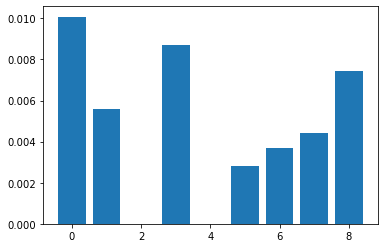

In [2052]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [2053]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [2054]:
from sklearn.feature_selection import RFE

rfe = RFE(model, 8)             # running RFE with 7 variables as output
rfe = rfe.fit(X_train, y_train)

In [2055]:
rfe.support_

array([ True,  True,  True, False,  True,  True,  True,  True,  True])

In [2056]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [2057]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Check_LLC_in_Name', True, 1),
 ('Email_Domain', True, 1),
 ('LS_Amount_to_Borrow', True, 1),
 ('LS_GAS', False, 2),
 ('LS_Months_in_Business', True, 1),
 ('LS_Self_Graded_Credit', True, 1),
 ('Web_Ad_Outlet_code', True, 1),
 ('Web_Ad_Outlet_Source_code', True, 1),
 ('LS_State_code', True, 1)]

In [2058]:
col = X_train.columns[rfe.support_]
col

Index(['Check_LLC_in_Name', 'Email_Domain', 'LS_Amount_to_Borrow',
       'LS_Months_in_Business', 'LS_Self_Graded_Credit', 'Web_Ad_Outlet_code',
       'Web_Ad_Outlet_Source_code', 'LS_State_code'],
      dtype='object')

In [2059]:
X_train_sm = sm.add_constant(X_train[col].values)

X_train_sm = sm.add_constant(X_train[col].values)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Is_Submitted   No. Observations:                10901
Model:                            GLM   Df Residuals:                    10892
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5183.4
Date:                Tue, 24 May 2022   Deviance:                       10367.
Time:                        14:13:59   Pearson chi2:                 1.09e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8865      0.100    -18.863      0.000      -2.082      -1.690
x1             0.7579      0.053     14.318      0.000       0.654       0.862
x2             0.2346      0.055      4.261      0.000       0.127       0.342
x3            -0.4861      0.196     -2.475      0.013      -0.871      -0.101
x4            -1.8588      0.574     -3.236      0.001      -2.985      -0.733
x5             0.2649      0.079      3.348      0.001       0.110       0.420
x6            -0.2998      0.081     -3.682      0.000      -0.459      -0.140
x7             0.0797      0.094      0.850      0.395      -0.104       0.263
x8            -0.3059      0.102     -2.991      0.003      -0.506      -0.105
==============================================================================
"""

In [2060]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

array([0.22697702, 0.25873797, 0.22536775, 0.26090663, 0.25597451,
       0.13812475, 0.19470695, 0.0968357 , 0.11156098, 0.21674394])

In [2061]:
y_train_pred = y_train_pred.reshape(-1)
y_train_pred[:10]

array([0.22697702, 0.25873797, 0.22536775, 0.26090663, 0.25597451,
       0.13812475, 0.19470695, 0.0968357 , 0.11156098, 0.21674394])

In [2062]:
Submitted_prob = y_train_pred
Submitted = y_train.values
y_train_pred_final = pd.DataFrame(Submitted,Submitted_prob)
                                  
                                   
y_train_pred_final['Prospect_ID'] = y_train.index

y_train_pred_final

,0,Prospect_ID
0.226977,0,8099
0.258738,0,2018
0.225368,0,7048
0.260907,0,7816
0.255975,0,13872
...,...,...
0.133825,0,14749
0.178356,0,3799
0.251527,1,11471
0.118478,0,12425


In [2063]:
y_train_pred_final.reset_index(inplace=True)

In [2064]:
y_train_pred_final.rename(columns = {"index":"Submitted_Prob", 0:"Submitted"}, inplace=True)

In [2065]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Submitted_Prob.map(lambda x: 1 if x > 0.25 else 0)
y_train_pred_final.head()

,Submitted_Prob,Submitted,Prospect_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.226977,0,8099,0,0,0,0,0,0,0,0,0,0
1,0.258738,0,2018,1,1,1,1,1,1,1,1,1,1
2,0.225368,0,7048,0,0,0,0,0,0,0,0,0,0
3,0.260907,0,7816,1,1,1,1,1,1,1,1,1,1
4,0.255975,0,13872,1,1,1,1,1,1,1,1,1,1


In [2066]:
y_train_pred_final['predicted'] = y_train_pred_final.Submitted_Prob.apply(lambda x: 1 if x > 0.25 else 0)

# Let's see the head
y_train_pred_final.head()

,Submitted_Prob,Submitted,Prospect_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0.226977,0,8099,0,0,0,0,0,0,0,0,0,0,0
1,0.258738,0,2018,1,1,1,1,1,1,1,1,1,1,1
2,0.225368,0,7048,0,0,0,0,0,0,0,0,0,0,0
3,0.260907,0,7816,1,1,1,1,1,1,1,1,1,1,1
4,0.255975,0,13872,1,1,1,1,1,1,1,1,1,1,1


In [2067]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Submitted, y_train_pred_final.predicted )
print(confusion)

[[6888 1917]
 [1354  742]]


In [2068]:
print(metrics.accuracy_score(y_train_pred_final.Submitted, y_train_pred_final.predicted))

0.6999357857077332


In [2069]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2070]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Web_Ad_Outlet_Source_code,5.43
4,LS_Self_Graded_Credit,3.30
7,LS_State_code,3.16
5,Web_Ad_Outlet_code,2.21
0,Check_LLC_in_Name,2.12
2,LS_Amount_to_Borrow,1.85
3,LS_Months_in_Business,1.61
1,Email_Domain,1.55


In [2071]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [2072]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.35400763358778625

In [2073]:
TN / float(TN+FP)
# calculate specificity

0.782282793867121

In [2074]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21771720613287904


In [2075]:
# positive predictive value 
print (TP / float(TP+FP))

0.279052275291463


In [2076]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8357194855617569


In [2077]:
from sklearn.metrics import roc_curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [2078]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Submitted, y_train_pred_final.Submitted_Prob, drop_intermediate = False )

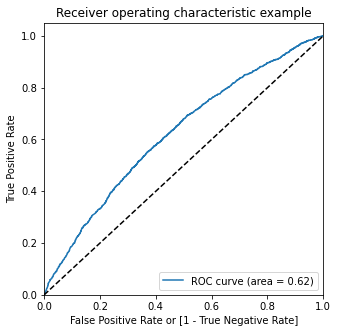

In [2079]:
draw_roc(y_train_pred_final.Submitted, y_train_pred_final.Submitted_Prob)

In [2080]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Submitted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.699936  0.354008  0.782283
0.1   0.1  0.699936  0.354008  0.782283
0.2   0.2  0.699936  0.354008  0.782283
0.3   0.3  0.699936  0.354008  0.782283
0.4   0.4  0.699936  0.354008  0.782283
0.5   0.5  0.699936  0.354008  0.782283
0.6   0.6  0.699936  0.354008  0.782283
0.7   0.7  0.699936  0.354008  0.782283
0.8   0.8  0.699936  0.354008  0.782283
0.9   0.9  0.699936  0.354008  0.782283


In [2081]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Submitted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Submitted_Prob,Submitted,Prospect_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0.226977,0,8099,1,1,1,0,0,0,0,0,0,0,0
1,0.258738,0,2018,1,1,1,0,0,0,0,0,0,0,1
2,0.225368,0,7048,1,1,1,0,0,0,0,0,0,0,0
3,0.260907,0,7816,1,1,1,0,0,0,0,0,0,0,1
4,0.255975,0,13872,1,1,1,0,0,0,0,0,0,0,1


In [2082]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Submitted_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Submitted_Prob,Submitted,Prospect_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead_Score
0,0.226977,0,8099,1,1,1,0,0,0,0,0,0,0,0,23
1,0.258738,0,2018,1,1,1,0,0,0,0,0,0,0,1,26
2,0.225368,0,7048,1,1,1,0,0,0,0,0,0,0,0,23
3,0.260907,0,7816,1,1,1,0,0,0,0,0,0,0,1,26
4,0.255975,0,13872,1,1,1,0,0,0,0,0,0,0,1,26


In [2083]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Submitted, y_train_pred_final.predicted )
confusion

array([[6888, 1917],
       [1354,  742]], dtype=int64)

In [2084]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.279052275291463

In [2085]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.35400763358778625

In [2086]:
from sklearn.metrics import precision_score, recall_score

In [2087]:
precision_score(y_train_pred_final.Submitted , y_train_pred_final.predicted)

0.279052275291463

In [2088]:
recall_score(y_train_pred_final.Submitted, y_train_pred_final.predicted)

0.35400763358778625

In [2089]:
from sklearn.metrics import precision_recall_curve

In [2090]:
y_train_pred_final.Submitted, y_train_pred_final.predicted

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 10896    0
 10897    0
 10898    1
 10899    0
 10900    0
 Name: Submitted, Length: 10901, dtype: int64,
 0        0
 1        1
 2        0
 3        1
 4        1
         ..
 10896    0
 10897    0
 10898    1
 10899    0
 10900    0
 Name: predicted, Length: 10901, dtype: int64)

In [2091]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Submitted, y_train_pred_final.Submitted_Prob)

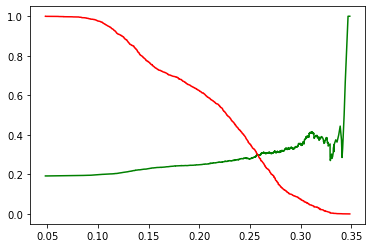

In [2092]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

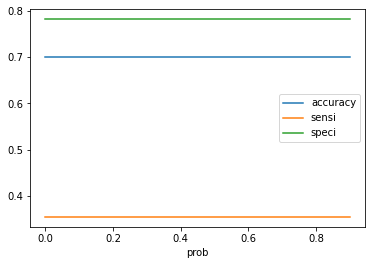

In [2093]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [2094]:
col = X_test.columns[rfe.support_]

In [2095]:
#Making predictions on the test set

X_test_sm = sm.add_constant(X_test[col].values)

In [2096]:
y_test_pred = res.predict(X_test_sm)

In [2097]:
y_test_pred[:10]

array([0.1052336 , 0.22719394, 0.23323625, 0.1154309 , 0.23983499,
       0.32728168, 0.19115908, 0.24796654, 0.11357576, 0.2707403 ])

In [2098]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [2099]:
# Let's see the head
y_pred_1.head()

,0
0,0.105234
1,0.227194
2,0.233236
3,0.115431
4,0.239835


In [2100]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [2101]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [2102]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2103]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [2104]:
y_pred_final.sample(10)

,Is_Submitted,Prospect ID,0
3209,0,15361,0.140120
2891,1,14864,0.163442
4542,1,14384,0.284635
3274,0,11451,0.116477
2010,0,15364,0.115183
3259,1,284,0.243894
4326,1,4309,0.236846
1104,0,14934,0.114309
3614,0,16392,0.257912
1676,0,9737,0.154711


In [2105]:
#y_pred_final.reset_index(inplace=True)

In [2106]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns = { 0:"Submitted_prob"})

In [2107]:
y_pred_final.sample(10)

,Is_Submitted,Prospect ID,Submitted_prob
1734,1,203,0.332256
1829,0,398,0.119159
409,0,10409,0.226077
3043,0,12292,0.272265
2452,0,14456,0.204884
828,0,15199,0.270105
660,0,1282,0.158246
2636,1,2112,0.240111
3455,0,4268,0.162736
3004,0,6958,0.235268


In [2108]:
y_pred_final['final_predicted'] = y_pred_final.Submitted_prob.map(lambda x: 1 if x > 0.25 else 0)

In [2109]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Is_Submitted,Prospect ID,Submitted_prob,final_predicted
0,0,13108,0.105234,0
1,0,1744,0.227194,0
2,0,15886,0.233236,0
3,0,15546,0.115431,0
4,0,7397,0.239835,0


In [2111]:
metrics.accuracy_score(y_pred_final.Is_Submitted, y_pred_final.final_predicted)

0.7027605392681361

In [2112]:
confusion2 = metrics.confusion_matrix(y_pred_final.Is_Submitted, y_pred_final.final_predicted )
confusion2

array([[2979,  819],
       [ 570,  305]], dtype=int64)

In [2113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2114]:
TP / float(TP+FN)

0.3485714285714286

In [2115]:
TN / float(TN+FP)

0.7843601895734598

In [1423]:
#ax = y_train_pred_final['Submitted_Prob'].plot.hist(bins=30)

In [1424]:
#ax = y_train_pred_final['Submitted'].plot.hist(bins=20)

In [1425]:
#ax = y_train_pred_final['predicted'].plot.hist(bins=20)

In [ ]:
#y_train_pred_final.to_csv('Sub_probmm4-11.csv', index = True)

In [2116]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.747


In [2117]:
#  Logistic regression
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [2118]:
accuracy_logreg = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross Validation Scores for Log Reg: {}".format(accuracy_logreg))
print("Mean Accuracy Score for Log Reg: {}".format(np.mean(accuracy_logreg)))
print()

Cross Validation Scores for Log Reg: [0.39369298 0.34457449 0.48859353 0.42511406 0.34874033]
Mean Accuracy Score for Log Reg: 0.40014307903277224



In [2121]:
#accuracy_score(y_test,y_pred, normalize=True) * 100

In [2122]:
print("Training score:", model.score(X_train, y_train))

Training score: 0.8077240620126593


In [2123]:
from sklearn.model_selection import cross_validate

scoring = {'acc': 'accuracy',
           'prec': 'precision',
           'rec': 'recall',
           'f1':'f1'}

scores = cross_validate(model,  X, y, scoring=scoring, cv=5, 
                        return_train_score=False)

In [2124]:
scores

{'fit_time': array([0.11299944, 0.15545297, 0.07814789, 0.07300425, 0.23643875]),
 'score_time': array([0.01400328, 0.01563931, 0.01614213, 0.01034141, 0.01484132]),
 'test_acc': array([0.39369298, 0.34457449, 0.48859353, 0.42511406, 0.34874033]),
 'test_prec': array([0.39612403, 0.32356918, 0.33714286, 0.42846329, 0.39207921]),
 'test_rec': array([0.40539468, 0.28480762, 0.02340341, 0.44920635, 0.55      ]),
 'test_f1': array([0.40070574, 0.30295359, 0.04376855, 0.43858969, 0.45780347])}

In [2125]:
KNN_model = KNeighborsClassifier()

In [2126]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracy_KNN = cross_val_score(KNN_model, X, y, cv=cv, scoring='accuracy')

print("Cross Validation Scores for Log KNN: {}".format(accuracy_KNN))
print("Mean Accuracy Score for KNN: {}".format(np.mean(accuracy_KNN)))

Cross Validation Scores for Log KNN: [0.70666402 0.68875223 0.69311645 0.68895061 0.69371157]
Mean Accuracy Score for KNN: 0.6942389738535126


In [2135]:
param_grid = {'n_neighbors': [1,2,3,4,5,6]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 1}
Best Cross Vlidation Score: 0.7120923146580429


In [2136]:
parameters = {'splitter': ('best','random'),
             'max_depth': [2,4,6],
             'max_features':[2,4,6, None],
             'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'splitter': 'best'}

In [2137]:
model = DecisionTreeClassifier(splitter=grid_search.best_params_['splitter'],
                                       max_depth=grid_search.best_params_['max_depth'],
                                      max_features=grid_search.best_params_['max_features'],
                                       criterion= grid_search.best_params_['criterion'])

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [2138]:
y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100

print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In-sample Accuracy: 62.04506982649175
Out-of-sample Accuracy: 61.32973659155824


In [2139]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Confusion Matrix
[[1661 1500]
 [ 937 2204]]
              precision    recall  f1-score   support

           0       0.64      0.53      0.58      3161
           1       0.60      0.70      0.64      3141

    accuracy                           0.61      6302
   macro avg       0.62      0.61      0.61      6302
weighted avg       0.62      0.61      0.61      6302



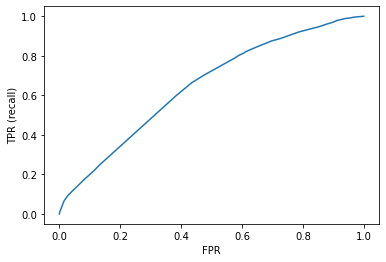

In [2140]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

In [2141]:
y_pred_prob =model.predict_proba(X_test)[:,1]
fpr,tpr, threshold= roc_curve(y_test,y_pred_prob)

In [2142]:
from sklearn.metrics import roc_auc_score

logreg_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) 
print("AUC for logreg: {:.3f}".format(logreg_auc))

AUC for logreg: 0.648


In [466]:
#from sklearn.model_selection import cross_val_score
#cv_scores = cross_val_score(model,X,y, cv=5, scoring='roc_auc')
#print(cv_scores)

In [2143]:
feature_names = X = LeadScore_df.drop('Is_Submitted', axis =1)

In [2144]:
#print(feature_names)
model.feature_importances_

array([0.02897495, 0.14836589, 0.1384599 , 0.05415849, 0.06582437,
       0.10392947, 0.17437628, 0.18753844, 0.09837221])

In [2149]:
#from sklearn import tree
#import graphviz
#fig = plt.figure(figsize=(20,15))

#class_names = ['0', '1']
#feature_names = X.columns

#dot_data = tree.export_graphviz(model, 
                  #feature_names=feature_names, 
                  #class_names=class_names,  
                 # filled=True, rounded=True,  
                  #special_characters=True,
                  #out_file=None)
                           
#graph = graphviz.Source(dot_data)
#graph

In [108]:
#graph.render("decision_treeLeadN_graphviz")
#'decision_treeLeadN_graphviz.png'

In [2146]:
## Calculating feature_importance = 
model.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_names, model.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'Feature_Importance'}, inplace = True)
feat_imp.sort_values(by=['Feature_Importance'], ascending=False).head()

,Feature_Importance
Web_Ad_Outlet_Source_code,0.187538
Web_Ad_Outlet_code,0.174376
Email_Domain,0.148366
LS_Amount_to_Borrow,0.138460
LS_Self_Graded_Credit,0.103929


In [520]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)

model.fit(X_train, y_train)

y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100
print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In-sample Accuracy: 93.28184511214558
Out-of-sample Accuracy: 78.45128530625199


In [521]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [148]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [149]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5817929358673957


In [ ]:
#len(CreditRisk_merge['contract_number'].unique())